# Data augmentation 논문 톹아보기

http://cs231n.stanford.edu/reports/2017/pdfs/300.pdf

여기서 보이는 이미지들은 논문에서 발췌한 것입니다.

제가 코드 구현으로 나온 결과는 * 표시를 한 것입니다.

## Abstract

*단순한 방식: 자르기,돌리기,뒤집기..등

<연구배경>

처음에는 단순한 방식으로 데이터 증강 기법의 효과를 입증해왔지만 이 논문에서는 이미지 분류분야에서 이 기법의 문제점과 해결책을  비교하고 탐색합니다.

<연구의 과정>

이 논문에서는 ImageNet dataset의 작은 부분을 가져온 후 여러 데이터 증가 기법을 사용해서 차례대로 비교를 합니다.

그리고 추가적으로, GANs기법을 이용하여 다른 스타일의 이미지를 생성하는 실험을 했고, classifier가 어떻게 데이터 증가을 배우는지에 대해서도 설명을 합니다.

<연구의 결론>

이 논문에서는 neural augmentation개념이 나오게 되는데 이는, 분류기가 NN을 통해서 augmentation을 학습하는 것으로 다양한 데이터셋이서 이 방식을 통해서 효과를 입증했습니다.

## Introduction

이 부분은 개요적인 부분이 강한 성격이라 조금은 추상적인 말들이 많습니다.


<문제1>

데이터 증가기법으로 데이터셋을 늘릴 경우, 데이터 셋들이 중구난방식으로 모아지게 되고 이 방대한 데이터를 정제과정없이 모델을 학습 시키면 수 많은 에러가 생기게 됩니다.

<해결책1>

그래서, 처음부터 많은 데이터를 모으려고 하지말고 작고 정제된 데이터셋으로부터 먼저 모델을 학습 시킨 후에 증가기법을 통헤서 데이터를 쌓아가는 것이 더 효과적입니다.

<문제2>

우리는 연구를 하면 다양한 데이터들이 필요하지만 의료계 같이 개인적인 인권이 보호받는 분야에서는 어려움을 겪게 됩니다.

<해결책2>

이때, 전문가의 도메인 지식과 학습된 모델을 겸비하면 뚜렷한 데이터를 모을 수 있게 되어 효율적인 데이터 수집과
모델링이 가능해지게 됩니다.

<실험전제조건>

작은 데이터셋으로 기본적인 분류가 가능하게 훈련을 한 후에 전통적인 데이터 증가기법을 이용하여 모델을 다시 훈련시킵니다.

<실험방식1>

데이터 증가기법이 MNIST데이터셋에도 도움이 되는지 보기 위해선, 두 개의 클래스로 규제하고 견고한 neural net classifiers을 만들어서 클래스를 추론합니다.

<실험방식2>

CycleGAN은 사람이 눈으로 보고 이해할수 있는 어떠한 이미지 내의 도메인을 스스로 학습하여, 서로 페어하지 않은 이미지 끼리라도 학습하여 변형하고 

적용이 가능하도록 만든 모델을 이용하여 낮/밤 또는 여름/겨울처럼 이미 결정이 된 이미지 데이터셋을 이용항 이미지의 스타일을 바꾸는 증가기법을 이용할겁니다.

<실험 정리>

Neural net은 augmentation을 배우고 분류 오류를 줄이는 방식입니다.

## Related work

이 부분에선 augmentation data가 어떻게 이미지 분류기의 수행 능력을 높였는지 보여주는 챕터입니다.

처음에는  작은 데이터셋으로 학습이 잘된 모델을 이용했지만.  과적합의 문제가 생길 수 있게 되어 여러 가지 방식을 이용하여 해결하려고 합니다.

첫 번째, L1,L2 regularization같은weight norm regularization을 이용하는 것입니다.

두 번째, dropout 기술을 사용하는 것입니다.

세 번째, 배치 정규화기법이용하는 것입니다.

네 번째, Transfer learning기술을 이용하여 데이터를 압축하고 파라미터를 fine tune하게되어 가장 좋은 효과를 내게 됩니다.

다섯 번째, Data augmentation기술 사용하는 것입니다.

위의 방식들을 가지고 과적합 문제를 해결할 수 있게 됩니다.

데이터가 MNIST인 경우, 현재 이미지 데이터 증가기법 훈련은 기하학적 변형과 색 변형을 수행하는 것하는 아파인 변형을 한 것이고 y=Wx+b형식을 따릅니다.

GANs는 훈련을 위해서 새로운 이미지를 만드는 것을 아주 잘하는 기술입니다.


GANs는 transfer learning 기술이 적은 데이터셋을 가졌음에도 큰 효과를 내고, 방대하고 좋은 이미지를 갖는 경우 또한 효과적입니다.
 
결국 이 논문의 핵심은 augment와 classify를 동시에 진행이 가능한 neural net를 훈련시킬 수 있는 모델을 만드는 것입니다.

훈련을 시키는 방식은 먼저, style transfer network를 이용하여  좋은 데이터 증가기법 학습하도록 합니다. 

이렇게 하면, 과적합 문제를 줄일 뿐만 아니라 classifier의 성능 향상에 도움이 됩니다.

그러한 이유로, affine 변형이나 GANs보다 간단하게 되어서 이 방식들을 굳이 사용할 필요가 없어집니다.



## Methods

논문에서는 데이터 증가기법하기 위해서 두 가지의 다른 접근 방식을 알려줍니다.

첫 번째, classifier를 분류하기 전에 증가 데이터를 생성하는 것입니다.

예를 들면, 큰 데이터를 만들기 위해서 기초적인 변형(자르기,회전,기타등)과 GANs를 적용하는 방식입니다.

위의 방식을 사용하게 되면 변형된 이미지들은 train and test로 들어가게 되고 원래 이미지는 validate로 이용됩니다.



두 번째, 이전 neural net을 통해서 augmentation학습시키
려는 시도입니다.

##### Training
    
    
무슨 말이냐면, 학습할 때 이 neural net이 train 이미지 셋 두 가지의 랜덤 이미지를 가져옵니다. 

그리고 nerual net는 training image set에서 주어진 이미지와 context혹은 스타일이 맞는 이미지를 매칭시켜서 하나의 "image"를 만들어냅니다.
 
이렇게 나온 결과물은 네트워크에 의해서 생성된 증가데이터이고, 이게 원본이미지와 함께 second classifying network를 거치게 됩니다.

그 결과, train loss는 역전파 과정을 거치게 되어서  classification layers들이 augmenting layers들을 잘 인지하게 됩니다.


##### Testing

Validation 또는 test set. 이미지들은 classification network를 거쳐야만 실행이 되는데,

그  이유는 주어진 데이터셋에서 최고의 augmentations를 인식하는 모델을 훈련시키기 위해서 입니다.
    
    
 
### Traditional Transformations

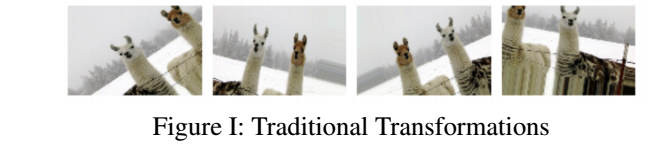

전통적인 변형은 어파인 변형으로 불리는 것들로 자르기, 회전, 색조 변화 등을 말한는 것입니다. 

이 방식은 원본 이미지와 변형된 이미지를 하나의 neural net에 넣기 때문에 원래 데이터의 사이즈가 N이었다면, 생성된 데이터 셋은 2N이 될 것입니다.

### Generative  Adversarial Networks

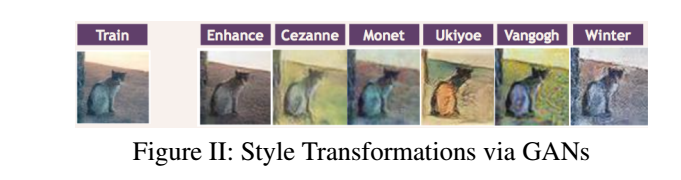

위의 6가지 이미지는 원본 이미지의 styled transformation한 것이고 원본이미지와 변형된 이미지가 train net에 들어가게 됩니다.

*GANs논문이 아니기에 자세히 설명을 드리진 않았습니다.*


### Learning the Augmentation


#### Testing

- Augmentation network

     - input: two images from same class
    
     - return: a layer with same size as a single image
    
    
- Classification network

   - augmented image가 통과되는 곳으로 원본 입력 이미지가 되는 과정입니다.
    
   - loss: cross entropy loss with sigmoids of scores of classes
    
   - Addition loss: augmentation network은 augmentation image가  input image와의 유사도를 결정합니다.
    
   - The overall loss is a weighted sum of these two losses.
    

- Different approaches

   - Content loss
    
   - Style loss via gram matrix
    
   -  No loss is computed at this layer


더 자세한 내용은 실험 파트에서 다룰 것입니다.

- Implementation : a small 5-layer CNN (augmentation 수행)


- Classifier

    - a small 3-layer net with batch normalization
    
    - pooling with 2 fc layers with dropout
    
    - VGG16과 유사한 구조지만 보다 작고 빠릅니다.
    
 
### Point of Paper


이 논문의 목적은 최적의 classifier을 찾는 것이 아니라 어떻게 augmentation tricks가 분류의 정확성을 높이고, 과적합을 줄이면서 네트워크의 속도를 향상시키는 지에 대한 탐구입니다.

*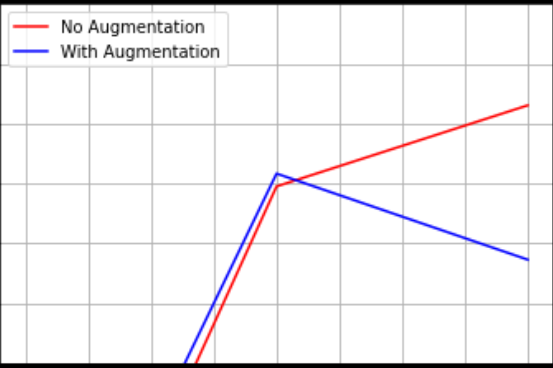


## Datasets and Features

세 가지의 이미지 데이터셋을 이용했고 각 데이터 셋에서 2가지의 클래스 정도만 사용했습니다.

이 작은 부분의 데이터는 testing으로 사용이되고, 
남은 이미지는 training : validation = 8:2로 나눠서 이용합니다.

### First data(Tiny-imagenet-200)

- Images: 64X64X3

- RGB: 전처리 과정에서 정규화가 됩니다.

- Dog images: 500장

- Cat images: 500장

- Each class: 400장이 training set에 할당됩니다.

- The remaining images: 100장이 각 클래스의 validation set로 들어갑니다.


### Second data(Tiny-imaenet-200)

-Images: 64X64X3

- RGB: 전처리 과정에서 정규화가 됩니다.

- Goldfish: 500장

- Dog: 500장


고양이와 강아지도 유사함이 있고, 고양이와 goldfish도 유사도(CNNs가 구별하기 힘들 정도)를 갖고 있지만 강아지와 goldfish는 유사하지 않습니다.



### MNIST

- Images: 28X28X1

- Gray scale

- 전처리 과정에서 이미지들이 정규화됩니다.

- Images: 2k

- class: 1000

- Distinguishing : 0's ~ 8's



## Experiments

ImageNet data를 가지고 10번의 실험을 했고, 이를 통해서 다양한 augmentation의 효과를 입증합니다.

[실험 전제 조건]

epochs =40, lr = 0.001 , Adam Optimization, 모든 epochs에서 가장 높은 test accuracy를 뽑아서 작성했습니다.

### Neural net

####  SmallNet

- 3 convolutional layres(with BN and Max pooling layer with 2 fc layers)

- Output: score matrix (with the weights for each class)

- VGG16 with fine-tuning on fc 

- VGG16 with last conv_layer (충분한 훈련이 가능해짐)


##### Structure of SmallNet

1. Conv with 16 channels and 3x3 filters. Relu activations.


2. Batch normalization.


3. Max pooling with 2x2 filters and 2x2 stride.


4. Conv with 32 channels and 3x3 filters. Relu activations.


5. Conv with 32 channels and 3x3 filters. Relu activations.


6. Batch normalization.


7. Max pooling with 2x2 filters and 2x2 stride.


8. Fully connected with output dimension 1024. Dropout.


9. Fully connected layer with output dimension 2.


#### Augmentation Network

- input of 6 channels deep: two images of same class 

- Goal: CNN(with same height and width , 3 channels deep)

- add: additional loss

- end: the output of the augmented layers with third image and same class

- Data size: N -> N ^2

##### Structure of Augmentation network

1. Conv with 16 channels and 3x3 filters. Relu activations.


2. Conv with 16 channels and 3x3 filters. Relu 
activations.


3. Conv with 16 channels and 3x3 filters. Relu activations.


4. Conv with 16 channels and 3x3 filters. Relu activations.


5. Conv with 3 channels and 3x3 filters.


### Training time

- Training batch: 배치 이미지 생성입니다.

- SmallNet성능 향상: SmallNet 와 gradients를 역전파시키기

- Pairs of images: 같은 클래스에서 샘플을 무작위하게 뽑고 AugNet에 넣으면 SmallNet에 통과될 augmented image이미지를 생성합니다.

- Neural net의 가중치는 업데이트됩니다.

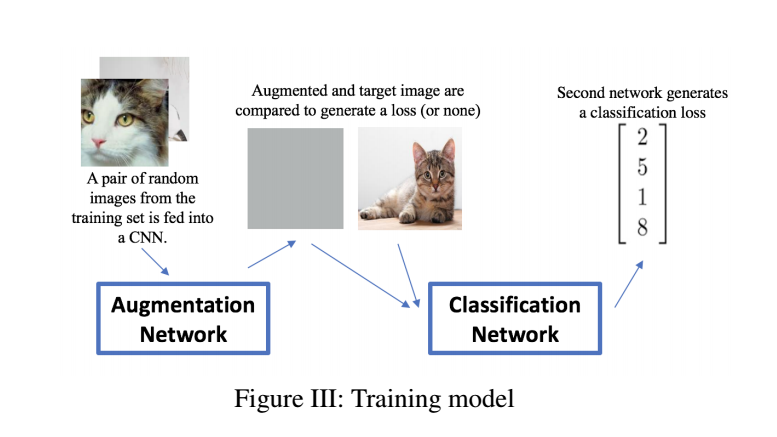


### Testing time

이미지를 SmallNet에 넣고, 들어온 이미지를 분류합니다.

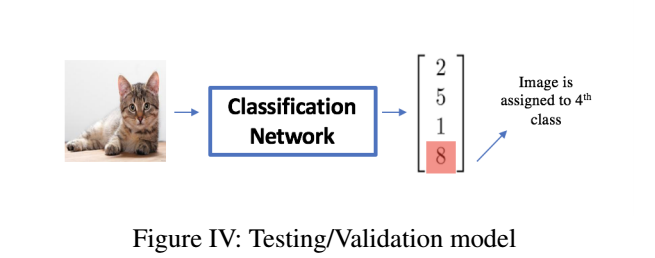
### Determination of Loss

*Lc: classification loss, La: augmentation loss

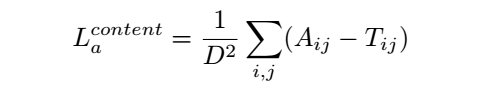

*MSE, A: augmented image, T: target image, D: the length of images A and T

Style loss는 gram matrix of A and T이고 gram matrix는 feature map, F입니다.

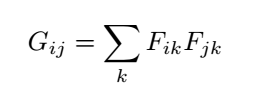

Loss는 채널의 개수 C로 정의됩니다.

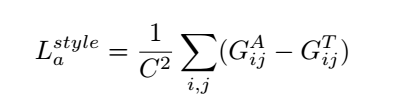

No loss인 경우, Classification loss는 SmallNet에 의한 multi-class cross entropy loss이고, 최종 loss는 두 개의 클래스의 가중치 합입니다.

만약, 베타 = 0이라면, no augmentation loss입니다.

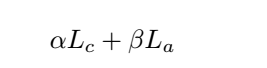

모델은 lr = 0.001 with Adam optimization이 훈련이 됩니다.

## Results

첫 실험은 개와 고양이를 분류하는 것이었고, 그 이후에 여러 실험들은 augmentation 기술의 효과를 탐색합니다.


### Experiments on traditional translation 

각 클래스의 이미지들에 전통적인 augmentation기법을 이용하여 SmallNet으로 모든 이미지를 훈련시킵니다.


### Experiments on GANs

GANs를 통해서 무작위로 각 이미지와 훈련 SmallNet을 생성합니다.


### Experiments on neural net augmentation

같은 class에서 2개의 이미지를 랜덤하게 고르고 첫 번째 이미지는 첫 3채널이고 2번째 이미지는 마지막 3채널입니다. 

Augmentation net에서 증강된 이미지는  64X64X3이고, augmentation Loss가 계산이 됩니다. 

뽑힌 두 개의 이미지는 나뉘어서 Training of SmallNet에 들어가게 되고 classification loss가 계산이 됩니다.

전체적인 로스는 두 로스(La + Lc)합입니다.


### Same experiments on dog vs goldfish

개와 고양이를 분류하는 것은 잘하나, goldfish와 같이 직관적으로 보기 어려운 문제들이 분류에서 존재합니다.

그래서 augmentation전략을 잘 세워서 robust한 알고리즘을 만들면 다른 데이터가 들어와도 좋은 결과를 내게 합니다.

### Control experiment

*experiment : dogs vs cats and dogs vs fish*

Validation 향상이 된 실험은 더 복잡한 network로 구성이 되어 있고, 과적합을 방지하고 finer training를 가능하게 합니다.

Validation 성능을 조절하기 위해서, 같은 두 개의 이미지를 Augmentation Net에 넣은 후 그 결과와 입력 이미지를 모두 SmallNet의 train data로 이용합니다.

그 결과,  데이터 증가 없이 다른 이미지를 쌓으로 한 데이터를 가지고도 10-layer net을 훈련 시킬 수 있게 됩니다. 

그러나, 주의할 점은 lr 설정을 잘 하셔야 좋ㅇㄴ 결과가 나오게 됩니다.

### Experiments with MNIST

MNIST data이용해서 적절한 neural augmentation strategies를 찾기가 이 파트 주된 내용입니다.

MNIST을 이용하는 이유는 ImageNet는 구조적이지도 않고 실험에서는 content loss 비교를 할 것이기에 이 loss 더 적합한 데이터는 MNIST입니다.

*아래의 이미지들은 실험 결과입니다.*

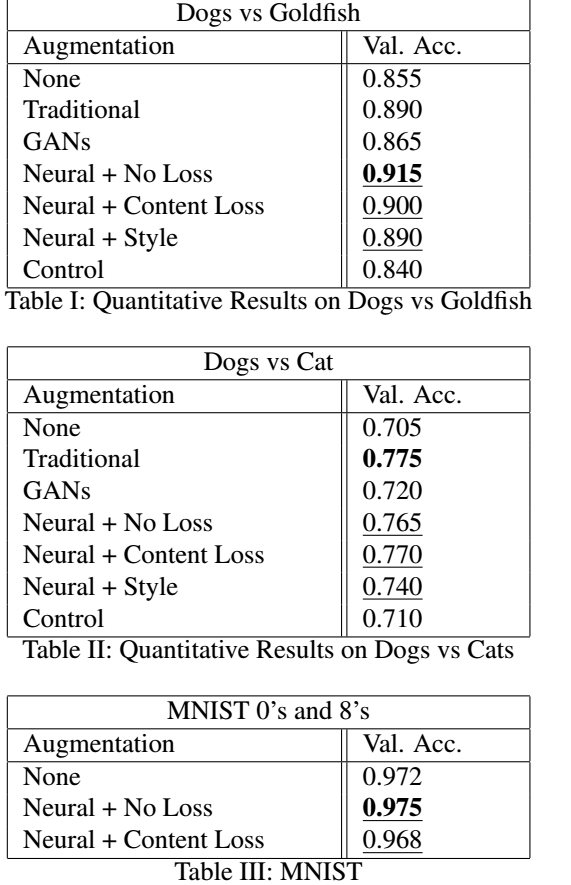

위의 실험결과를 바탕으로 알 수 있는 것은 Neural augmentation은 no augmentation보다 훨씬 더 유의미한 결과를 낼 수 있다는 것입니다.

그러나, 데이터 처리 시간이 짧을 땐 전통적인 augmentation이 더 효과적인 것을 실험 2번째를 통해서 알 수 있습니다.

이제 총 정리를 하려고 합니다.

최고로 수행을 잘하는 이미지를 생성하기 위해서는 정규화의 형태가 되어야 하기에 색과 배경이 흐릿해야합니다. 그래야 대조적인 효과를 내어서 세부적인 것들을 잘 분류할 수 있게 됩니다.

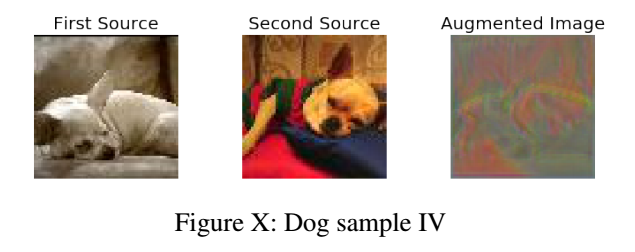

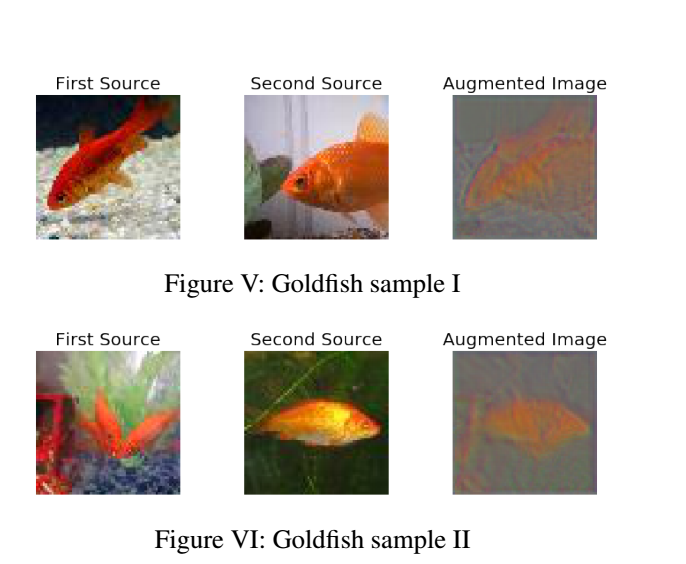


그래프 해석을 끝으로 마무리를 하겠습니다.

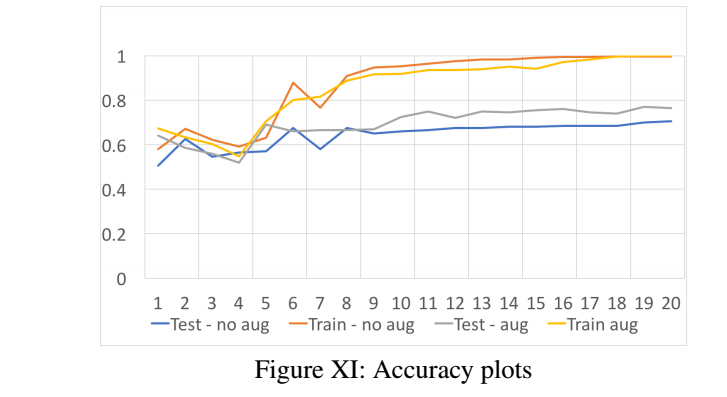


Neural augmentation은 과적합을 방지합니다.

학습 증강이 분류기가  일반화하는데 도움을 줍니다.

이번 논문에서 보인 다양한 실험에선 손실함수를 고정시키지 않고 다양하게 썼습니다. 



## Conclusion/ Future Work


데이터 증가기법은 분류테스크의 정확성을 높이기 위해서 사용이 됩니다. 

전통적인 방식 과 CycleGAN기술들이 좋은 성능을 이뤘고, 이것을 기반으로 논문은 여러 training images를 이용하여


augmentation을 학습하도록 모델을 구축하니 정확히 이미지를 분류할 수 있는 정도까지 만들게 됩니다.

SmallNet가 아닌 VGG16을 이용하여 augmentation 기술을 사용하면, 정규화와 과적합 문제가 생기게 됩니다.


결론적으로, 이 논문에서 말한 요지는 augmentation을 여러 방식들로 이용하면 정보를 못 모아서 생기는 어려움을 줄일 수 있게 되고 최적화 문제도 해결이 가능합니다.

거기다가 강화학습 분야를 접목시킨다면, 데이터 증가기법을 더 효과적으로 쓸 수 있습니다.